# Data Loader

In [6]:
import numpy as np
from moabb.datasets import BNCI2014002
import pandas as pd
import mne
from moabb.paradigms import  MotorImagery
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
paradigm = MotorImagery(n_classes = 2)
dataset = BNCI2014002()
subjects = [1]


X, y, metadata = paradigm.get_data(dataset=dataset, subjects=subjects)
X = np.delete(X, -1,axis = 2)

Choosing from all possible events


In [8]:
X.shape

(160, 15, 2560)

In [32]:
from scipy.signal import welch

In [157]:
f = np.apply_along_axis(welch, 1, X[100], fs = 512, nperseg = 1*512)

(0, 35)

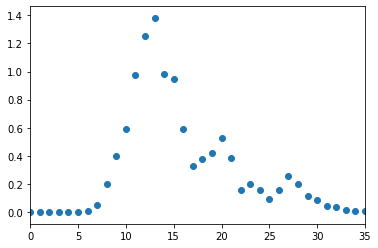

In [158]:
plt.scatter(f[0,0], f[10,1])
plt.xlim([0,35])

In [154]:
f[5:36,1].reshape(257*10).shape

ValueError: cannot reshape array of size 1930 into shape (2570,)

In [70]:
X[0].shape

(15, 2560)

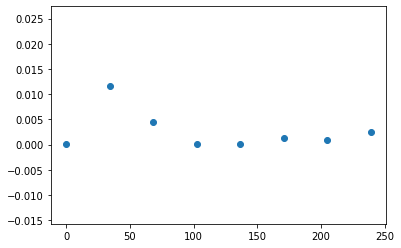

In [73]:
plt.scatter(f[:,0], psd[:,])

In [78]:
X2d = X[0]
for i in range(1, X.shape[0]):
    X2d = np.concatenate((X2d, X[i]), axis = 1)
X2d.shape

(15, 409600)

In [ ]:
def get_raw(dataset, paradigm, n_channels, sfreq):
    '''
    Takes a dataset from moabb datasets and creates 3 dictionaries with subject number as keys and X matrix, y labels and metadata
    as dictionary values respectively.
    X: Original 3D data matrix (num_cases, n_channels, lectures) is reshaped to 2D matrix (len(num_cases)*len(lectures),len(n_channels))
    y: This array corresponds with the class for each case. It has num_cases length.
    metadata: Describes each subject
    '''
    
    subjects_all = dataset.subject_list
    channels = [str(a+1) for a in range(n_channels)]
    

    X_all_subjects = {}
    y_all_subjects = {}
    metadata_all_subjects = {}
    
    for subject in subjects_all:
        
        X, y, metadata = paradigm.get_data(dataset=dataset, subjects=[subject])
        X = np.delete(X, -1,axis = 2)
        X_2d = X.reshape(n_channels,(X.shape[0]*X.shape[2]))
        data_mne = X_2d
        data_mne = data_mne / 1000000      
                        
        info_mne = mne.create_info(
            ch_names=channels,
            ch_types='eeg',
            sfreq=sfreq)
        
        raw = mne.io.RawArray(data_mne, info_mne)
        #ten_twenty_montage = mne.channels.make_standard_montage('standard_1020')
        #raw_1020 = raw.copy().set_montage(ten_twenty_montage)

        X_all_subjects.update({str(subject):raw})
        y_all_subjects.update({str(subject):y})
        metadata_all_subjects.update({str(subject):metadata})
        
    return X_all_subjects, y_all_subjects, metadata_all_subjects
        
        
X_all_subjects, y_all_subjects, metadata_all_subjects = get_raw(dataset, paradigm, 22, 250)

print(X_all_subjects)
    
    

In [ ]:
X_all_subjects

In [ ]:
# Way to acces an specific subject
subject_i = X_all_subjects['3']
plot_fig = subject_i.plot(scalings = 0.5e-4)

In [ ]:
# Way to iterate among the dictionary with all subjects

for k,v  in X_all_subjects.items():
    plot_fig = v.plot(scalings = 0.5e-3)

In [ ]:
#Para pasar a .fif

path = '../data/vendor/bnci-001-2014'
for k,v  in X_all_subjects.items():
    v.save(f'{path}/bnci-001-2014-{k}.fif', overwrite=True)

In [ ]:
for number,subject in X_all_subjects.items():
    fig = subject.plot_psd(fmin = 0, fmax = 300, average=False, tmin = 0, tmax = 250)

In [162]:
from lib import aisat as ai

In [163]:
paradigm = MotorImagery(n_classes = 2)
dataset = BNCI2014002()

path = './test_path/eeg'

ai.extract_features(dataset, paradigm, 512, path)

Choosing from all possible events


0

1

2

3

4

5

6

7

8

9

10

11

12

13

